# Watch Image Regression

**Team:4**
* Harsh Deokuliar
* Sameer Mahajan


**Course:** DAAN 570– Deep Learning (Spring I, 2022)

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import pandas as pd
#importing all libraries needed

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import io
#import splitfolders
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

#model
import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,GlobalAveragePooling2D,AveragePooling2D,BatchNormalization,concatenate
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model , models
from tensorflow.keras.applications import EfficientNetB3,InceptionV3, ResNet50, DenseNet121,DenseNet201,EfficientNetB6, VGG16, VGG19, ResNet101V2
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**We will be using our CSV file which has the details of scraped files for watches**



In [2]:
df = pd.read_csv('C:/Users/parvb/Downloads/Sameer_Harsh/data/watchesscrapper_1_50.csv')
df['filename'] = df['title_prie'] + '.png'
df.head()

,Unnamed: 0,URL,Price,title,num,url_title,title_prie,brand,filename
0,5149,https://cdn2.chrono24.com/images/uhren/2224073...,900,Rolex Datejust 41 Blue Index Dial Jubilee Brac...,5149,Rolex Datejust 41 Blue Index Dial Jubilee Brac...,Rolex Datejust 41 Blue Index Dial Jubilee Brac...,Rolex,Rolex Datejust 41 Blue Index Dial Jubilee Brac...
1,2727,https://cdn2.chrono24.com/images/uhren/1227389...,"2,100",Rolex Datejust 41 mm Stainless Steel Smooth Be...,2727,Rolex Datejust 41 mm Stainless Steel Smooth Be...,Rolex Datejust 41 mm Stainless Steel Smooth Be...,Rolex,Rolex Datejust 41 mm Stainless Steel Smooth Be...
2,12600,https://cdn2.chrono24.com/images/uhren/2214911...,"2,700",Rolex Lady-Datejust Gold Oyster Perpetual 26,12600,"Rolex Lady-Datejust Gold Oyster Perpetual 26_""...",Rolex Lady-Datejust Gold Oyster Perpetual 26_2...,Rolex,Rolex Lady-Datejust Gold Oyster Perpetual 26_2...
3,3304,https://cdn2.chrono24.com/images/uhren/2265675...,"2,735",Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...,3304,Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...,Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...,Rolex,Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...
4,11149,https://cdn2.chrono24.com/images/uhren/2214880...,"2,735",Rolex Lady Date Automatik Edelstahl Damenuhr O...,11149,Rolex Lady Date Automatik Edelstahl Damenuhr O...,Rolex Lady Date Automatik Edelstahl Damenuhr O...,Rolex,Rolex Lady Date Automatik Edelstahl Damenuhr O...


In [3]:
class_names=['Rolex', 'Casio', 'Breitling','Gucci','Seiko']



#Assigning index to class names for visualization later
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}



nb_classes = len(class_names)



# converting all our images to (150,150) dimension
IMAGE_SIZE = (180,180)

In [4]:
df

,Unnamed: 0,URL,Price,title,num,url_title,title_prie,brand,filename
0,5149,https://cdn2.chrono24.com/images/uhren/2224073...,900,Rolex Datejust 41 Blue Index Dial Jubilee Brac...,5149,Rolex Datejust 41 Blue Index Dial Jubilee Brac...,Rolex Datejust 41 Blue Index Dial Jubilee Brac...,Rolex,Rolex Datejust 41 Blue Index Dial Jubilee Brac...
1,2727,https://cdn2.chrono24.com/images/uhren/1227389...,"2,100",Rolex Datejust 41 mm Stainless Steel Smooth Be...,2727,Rolex Datejust 41 mm Stainless Steel Smooth Be...,Rolex Datejust 41 mm Stainless Steel Smooth Be...,Rolex,Rolex Datejust 41 mm Stainless Steel Smooth Be...
2,12600,https://cdn2.chrono24.com/images/uhren/2214911...,"2,700",Rolex Lady-Datejust Gold Oyster Perpetual 26,12600,"Rolex Lady-Datejust Gold Oyster Perpetual 26_""...",Rolex Lady-Datejust Gold Oyster Perpetual 26_2...,Rolex,Rolex Lady-Datejust Gold Oyster Perpetual 26_2...
3,3304,https://cdn2.chrono24.com/images/uhren/2265675...,"2,735",Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...,3304,Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...,Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...,Rolex,Rolex Sea-Dweller Automatik Stahl Herrenuhr Oy...
4,11149,https://cdn2.chrono24.com/images/uhren/2214880...,"2,735",Rolex Lady Date Automatik Edelstahl Damenuhr O...,11149,Rolex Lady Date Automatik Edelstahl Damenuhr O...,Rolex Lady Date Automatik Edelstahl Damenuhr O...,Rolex,Rolex Lady Date Automatik Edelstahl Damenuhr O...
...,...,...,...,...,...,...,...,...,...
14695,14695,https://cdn2.chrono24.com/images/uhren/2269320...,"2,841",Seiko 良品箱付【SEIKO】セイコー グランドセイコー メカニカル 9S68-00B0...,14695,Seiko 良品箱付【SEIKO】セイコー グランドセイコー メカニカル 9S68-00B0...,Seiko 良品箱付【SEIKO】セイコー グランドセイコー メカニカル 9S68-00B0...,Seiko,Seiko 良品箱付【SEIKO】セイコー グランドセイコー メカニカル 9S68-00B0...
14696,14696,https://cdn2.chrono24.com/images/uhren/2253789...,62,Seiko 5 Actus Automatic Watch Silver Dial,14696,"Seiko 5 Actus Automatic Watch Silver Dial_""htt...",Seiko 5 Actus Automatic Watch Silver Dial_62_1...,Seiko,Seiko 5 Actus Automatic Watch Silver Dial_62_1...
14697,14697,https://cdn2.chrono24.com/images/uhren/2225036...,"1,164",Seiko 6138-8020 Panda,14697,"Seiko 6138-8020 Panda_""https://cdn2.chrono24.c...","Seiko 6138-8020 Panda_1,164_14697",Seiko,"Seiko 6138-8020 Panda_1,164_14697.png"
14698,14698,https://cdn2.chrono24.com/images/uhren/2210536...,756,Seiko Prospex Kinetic Land GMT green Dial,14698,"Seiko Prospex Kinetic Land GMT green Dial_""htt...",Seiko Prospex Kinetic Land GMT green Dial_756_...,Seiko,Seiko Prospex Kinetic Land GMT green Dial_756_...


function to load data in train, test, val split

In [7]:
#function to load images from the directories into numpy arrays. We also store the image labels in numpy arrays.
def load_data():

    datasets = ["C:/Users/parvb/Downloads/Sameer_Harsh/data/output/train", "C:/Users/parvb/Downloads/Sameer_Harsh/data/output/test","C:/Users/parvb/Downloads/Sameer_Harsh/data/output/val"]
    output = []

# Iterate through dataset
    for dataset in datasets:

#         images = []
        fullfile =[]
        labels = []
        prices = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

        # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                row = df[df["filename"] == file]
                if row.empty:
                    price = 0

                else:
                    price = int(row['Price'].item().strip('$').replace(',',''))

                

                # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

            # Open and resize the img
                    #print(file)
                    #image = cv2.imread(img_path)
                    #print(type(image))
                    #if (type(image) is np.ndarray):
                        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        #image = cv2.resize(image, IMAGE_SIZE)

                    # Append the image and its corresponding label to the output
#                         images.append(image)
                    fullfile.append(img_path)
                    labels.append(label)
                    prices.append(price)

#         images = np.array(images, dtype = 'float32')
        #labels = np.array(labels, dtype = 'int32')
        #prices = np.array(prices, dtype = 'float32')

        output.append((fullfile,labels,prices))



    return output



In [9]:
(train_images,train_labels,train_prices),(val_images,val_labels,val_prices),(test_images,test_labels,test_prices)=load_data()

Loading C:/Users/parvb/Downloads/Sameer_Harsh/data/output/train


100%|██████████| 2112/2112 [00:01<00:00, 1322.02it/s]


Loading C:/Users/parvb/Downloads/Sameer_Harsh/data/output/test


100%|██████████| 264/264 [00:00<00:00, 1419.32it/s]


Loading C:/Users/parvb/Downloads/Sameer_Harsh/data/output/val


100%|██████████| 264/264 [00:00<00:00, 1404.26it/s]


In [10]:
# norm = np. linalg. norm(train_prices)
# normal_array = train_prices/norm
print(len(train_images))
print(len(train_prices))
print(len(train_labels))

10404
10404
10404


Getting fullfile path, price and label into train_data, test_data, val_data

In [11]:
train_data = pd.DataFrame(train_images,columns=['Fullfile'])
train_data['price'] = train_prices
train_data['label'] = train_labels

val_data = pd.DataFrame(val_images,columns=['Fullfile'])
val_data['price'] = val_prices
val_data['label'] = val_labels

test_data = pd.DataFrame(test_images,columns=['Fullfile'])
test_data['price'] = test_prices
test_data['label'] = test_labels

In [12]:
count=0
for i in range(train_data.shape[0]):
    if train_data['price'].iloc[i] == 'POR':
        count +=1
print(count)

0


In [13]:
print(val_data.shape)
print(test_data.shape)
# print(val_data.shape

(1305, 3)
(1308, 3)


**Using DataGenerator**

In [14]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True,
                                   fill_mode = "nearest", zoom_range = 0.2,
                                   width_shift_range = 0.2, height_shift_range=0.2,
                                 rotation_range=30) 

train_generator = datagen.flow_from_dataframe(dataframe=train_data, 
                                              x_col="Fullfile", y_col="price", 
                                              class_mode="raw", target_size=(180, 180), 
                                              batch_size=32)

val_generator = datagen.flow_from_dataframe(dataframe=val_data, 
                                              x_col="Fullfile", y_col="price", 
                                              class_mode="raw", target_size=(180, 180), 
                                              batch_size=32)

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_data, 
                                              x_col="Fullfile", y_col="price", 
                                              class_mode="raw", target_size=(180, 180))

Found 10404 validated image filenames.
Found 1305 validated image filenames.
Found 1308 validated image filenames.


Our ImageDataGenerator has been initialized and now will be used for image regression.

Preprocessing steps had been taken care during classification , which included

1) Removing images which were not watches( items like watch spareparts, belts, etc). This was done manually.

2) Reshaping images to 180,180 dimension for image classification using DNNs

3) Converting all our data into a dataframe as we used the flow_from_dataframe to create the datagenerator for image regression

### Methodology

We will be training 3 deep learning models - DenseNet201 , InceptionV3 and our own custom model.

 * DenseNet201
    * DenseNet-201 is a convolutional neural network that is 201 layers deep. It has around 18 million parametres.
 * InceptionV3
    * Inception v3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. Its has around 21 million parameters.
 
 * Custome model
     * Our custom model consists of 5 Conv2D layers, with (3,3) sized windows, followed by a flatten and 5 dense layers and then the output layer with an linear activation. All hidden layers have relu activation functions.

## DenseNet201 Image Regression

In [37]:
DNET = DenseNet201(input_shape=(180,180, 3), include_top=False, weights="imagenet")

for layer in DNET.layers:
    layer.trainable=False
    
DenseNet121_model=Sequential()
DenseNet121_model.add(DNET)
DenseNet121_model.add(Flatten())
DenseNet121_model.add(Dense(1024, activation='relu'))
DenseNet121_model.add(Dense(512, activation='relu'))
DenseNet121_model.add(Dense(256, activation='relu'))
DenseNet121_model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.22))
DenseNet121_model.add(Dropout(0.2))
#model.add(Dense(n_classes, activation='softmax'))
DenseNet121_model.add(Dense(1, activation='linear'))
learning_rate = 0.001
DenseNet121_model.compile(loss = 'mse',metrics=[MeanAbsoluteError(),MeanAbsolutePercentageError()],
              optimizer = Adam(learning_rate))

In [38]:
DenseNet121_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 5, 5, 1920)        18321984  
                                                                 
 flatten_1 (Flatten)         (None, 48000)             0         
                                                                 
 dense_5 (Dense)             (None, 1024)              49153024  
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [39]:

history=DenseNet121_model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=128)

Epoch 1/100
326/326 [==============================] - 72s 195ms/step - loss: 187136048.0000 - mean_absolute_error: 5828.0659 - mean_absolute_percentage_error: 501.8994 - val_loss: 275422944.0000 - val_mean_absolute_error: 5337.3657 - val_mean_absolute_percentage_error: 331.9203
Epoch 2/100
326/326 [==============================] - 61s 187ms/step - loss: 174624544.0000 - mean_absolute_error: 5476.6045 - mean_absolute_percentage_error: 425.8396 - val_loss: 275309952.0000 - val_mean_absolute_error: 5649.1528 - val_mean_absolute_percentage_error: 441.8475
Epoch 3/100
326/326 [==============================] - 61s 187ms/step - loss: 166872992.0000 - mean_absolute_error: 5247.1636 - mean_absolute_percentage_error: 405.1384 - val_loss: 274335712.0000 - val_mean_absolute_error: 6165.3335 - val_mean_absolute_percentage_error: 517.1290
Epoch 4/100
326/326 [==============================] - 61s 187ms/step - loss: 159940336.0000 - mean_absolute_error: 5125.0347 - mean_absolute_percentage_error: 

326/326 [==============================] - 61s 186ms/step - loss: 90037712.0000 - mean_absolute_error: 4155.9839 - mean_absolute_percentage_error: 288.8960 - val_loss: 278108192.0000 - val_mean_absolute_error: 5141.9253 - val_mean_absolute_percentage_error: 255.1635
Epoch 60/100
326/326 [==============================] - 61s 186ms/step - loss: 86459024.0000 - mean_absolute_error: 4124.3774 - mean_absolute_percentage_error: 291.0699 - val_loss: 289597248.0000 - val_mean_absolute_error: 5627.2710 - val_mean_absolute_percentage_error: 283.3647
Epoch 61/100
326/326 [==============================] - 61s 186ms/step - loss: 86588568.0000 - mean_absolute_error: 4152.2310 - mean_absolute_percentage_error: 289.9847 - val_loss: 280552320.0000 - val_mean_absolute_error: 5347.3247 - val_mean_absolute_percentage_error: 264.9394
Epoch 62/100
326/326 [==============================] - 61s 187ms/step - loss: 78619112.0000 - mean_absolute_error: 3997.5774 - mean_absolute_percentage_error: 286.9977 - va

In [40]:
DenseNet121_model.save('watch_regression_densenet.h5')

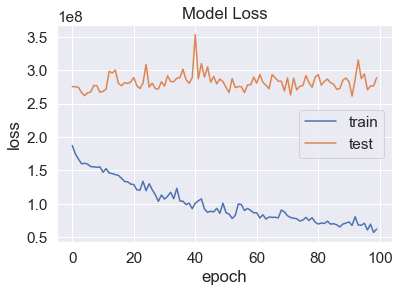

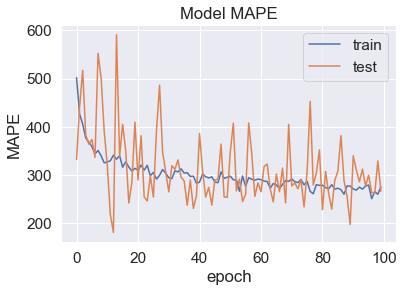

In [41]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test']) 
plt.show()

plt.plot(history.history['mean_absolute_percentage_error']) 
plt.plot(history.history['val_mean_absolute_percentage_error']) 
plt.title('Model MAPE') 
plt.ylabel('MAPE') 
plt.xlabel('epoch') 
plt.legend(['train', 'test']) 
plt.show()


## InceptionV3 Image Regression

In [20]:
INV3 = InceptionV3(input_shape=(180,180, 3), include_top=False, weights="imagenet")

for layer in INV3.layers:
    layer.trainable=False
    
inceptionv3_model=Sequential()
inceptionv3_model.add(INV3)
inceptionv3_model.add(Flatten())
inceptionv3_model.add(Dense(1024, activation='relu'))
inceptionv3_model.add(Dense(512, activation='relu'))
inceptionv3_model.add(Dense(256, activation='relu'))
inceptionv3_model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.22))
inceptionv3_model.add(Dropout(0.2))
inceptionv3_model.add(Dense(1, activation='linear'))
learning_rate = 0.001
inceptionv3_model.compile(loss = 'mse',metrics=[MeanAbsoluteError(),MeanAbsolutePercentageError()],
              optimizer = Adam(learning_rate))

In [21]:
inceptionv3_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1024)              33555456  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0

In [22]:
history=inceptionv3_model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=128)

Epoch 1/100
326/326 [==============================] - 77s 212ms/step - loss: 192711184.0000 - mean_absolute_error: 6114.4165 - mean_absolute_percentage_error: 572.7638 - val_loss: 288101888.0000 - val_mean_absolute_error: 7012.9946 - val_mean_absolute_percentage_error: 663.3221
Epoch 2/100
326/326 [==============================] - 60s 185ms/step - loss: 183586736.0000 - mean_absolute_error: 5815.6147 - mean_absolute_percentage_error: 508.7890 - val_loss: 291299200.0000 - val_mean_absolute_error: 7393.2334 - val_mean_absolute_percentage_error: 797.8007
Epoch 3/100
326/326 [==============================] - 60s 183ms/step - loss: 179033168.0000 - mean_absolute_error: 5666.6909 - mean_absolute_percentage_error: 488.1969 - val_loss: 299249408.0000 - val_mean_absolute_error: 5353.1035 - val_mean_absolute_percentage_error: 223.8811
Epoch 4/100
326/326 [==============================] - 60s 183ms/step - loss: 174711520.0000 - mean_absolute_error: 5523.6040 - mean_absolute_percentage_error: 

326/326 [==============================] - 64s 196ms/step - loss: 120261720.0000 - mean_absolute_error: 5013.3184 - mean_absolute_percentage_error: 416.6783 - val_loss: 288053056.0000 - val_mean_absolute_error: 5855.0977 - val_mean_absolute_percentage_error: 376.5263
Epoch 60/100
326/326 [==============================] - 70s 214ms/step - loss: 130212008.0000 - mean_absolute_error: 5016.2285 - mean_absolute_percentage_error: 416.3562 - val_loss: 278231392.0000 - val_mean_absolute_error: 6196.6084 - val_mean_absolute_percentage_error: 452.4127
Epoch 61/100
326/326 [==============================] - 66s 204ms/step - loss: 120189496.0000 - mean_absolute_error: 5016.1528 - mean_absolute_percentage_error: 408.0521 - val_loss: 284918176.0000 - val_mean_absolute_error: 5945.1519 - val_mean_absolute_percentage_error: 392.0259
Epoch 62/100
326/326 [==============================] - 60s 184ms/step - loss: 120587032.0000 - mean_absolute_error: 5013.9312 - mean_absolute_percentage_error: 424.1221 

In [23]:
inceptionv3_model.save('new_watch_regression_inceptionv3.h5')

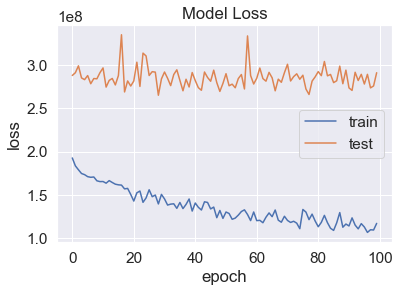

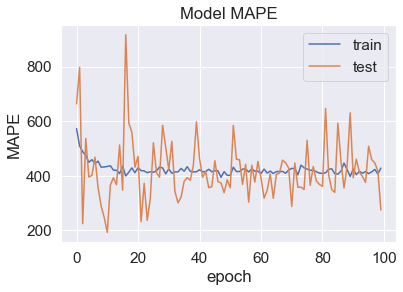

In [24]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test']) 
plt.show()

plt.plot(history.history['mean_absolute_percentage_error']) 
plt.plot(history.history['val_mean_absolute_percentage_error']) 
plt.title('Model MAPE') 
plt.ylabel('MAPE') 
plt.xlabel('epoch') 
plt.legend(['train', 'test']) 
plt.show()

## Custom model for Image Regression

In [19]:
custom_model = Sequential()
custom_model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(180,180,3),activation='relu'))
custom_model.add(AveragePooling2D(2))
# custom_model.add(Dropout(0.4))

custom_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
custom_model.add(AveragePooling2D(2))
# custom_model.add(Dropout(0.4))



custom_model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
custom_model.add(AveragePooling2D(2))
# custom_model.add(Dropout(0.4))


custom_model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
custom_model.add(AveragePooling2D(2))
custom_model.add(Dropout(0.4))


custom_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
custom_model.add(AveragePooling2D(2))
custom_model.add(Dropout(0.4))
custom_model.add(Flatten())

custom_model.add(Dense(32, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.4))

custom_model.add(Dense(1,activation='linear'))

learning_rate = 0.001
custom_model.compile(loss = 'mse',metrics=[MeanAbsoluteError(),MeanAbsolutePercentageError()],
              optimizer = Adam(learning_rate))

In [20]:
custom_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 average_pooling2d_5 (Averag  (None, 89, 89, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 128)       73856     
                                                                 
 average_pooling2d_6 (Averag  (None, 43, 43, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 256)       295168    
                                                                 
 average_pooling2d_7 (Averag  (None, 20, 20, 256)     

In [21]:
history=custom_model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=128)

Epoch 1/100
326/326 [==============================] - 69s 188ms/step - loss: 250250944.0000 - mean_absolute_error: 6446.4019 - mean_absolute_percentage_error: 99.8205 - val_loss: 365362048.0000 - val_mean_absolute_error: 6989.6260 - val_mean_absolute_percentage_error: 101.1084
Epoch 2/100
326/326 [==============================] - 59s 181ms/step - loss: 250093392.0000 - mean_absolute_error: 6426.8613 - mean_absolute_percentage_error: 98.7322 - val_loss: 366122752.0000 - val_mean_absolute_error: 7040.0493 - val_mean_absolute_percentage_error: 110.3435
Epoch 3/100
326/326 [==============================] - 59s 182ms/step - loss: 249728688.0000 - mean_absolute_error: 6411.6191 - mean_absolute_percentage_error: 96.4626 - val_loss: 364459392.0000 - val_mean_absolute_error: 6936.0908 - val_mean_absolute_percentage_error: 96.2134
Epoch 4/100
326/326 [==============================] - 60s 184ms/step - loss: 249223680.0000 - mean_absolute_error: 6379.1992 - mean_absolute_percentage_error: 92.9

326/326 [==============================] - 61s 188ms/step - loss: 183261264.0000 - mean_absolute_error: 5864.0830 - mean_absolute_percentage_error: 607.0885 - val_loss: 290089504.0000 - val_mean_absolute_error: 6660.0078 - val_mean_absolute_percentage_error: 707.1347
Epoch 60/100
326/326 [==============================] - 61s 188ms/step - loss: 183288864.0000 - mean_absolute_error: 5843.7070 - mean_absolute_percentage_error: 615.3110 - val_loss: 287063200.0000 - val_mean_absolute_error: 7642.6836 - val_mean_absolute_percentage_error: 897.9482
Epoch 61/100
326/326 [==============================] - 61s 188ms/step - loss: 182989360.0000 - mean_absolute_error: 5800.7490 - mean_absolute_percentage_error: 597.4663 - val_loss: 292872512.0000 - val_mean_absolute_error: 6158.3794 - val_mean_absolute_percentage_error: 518.4960
Epoch 62/100
326/326 [==============================] - 62s 191ms/step - loss: 181903760.0000 - mean_absolute_error: 5854.7280 - mean_absolute_percentage_error: 614.3893 

In [22]:
custom_model.save('watch_regression_custom_model.h5')

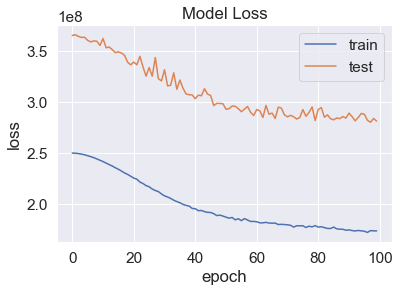

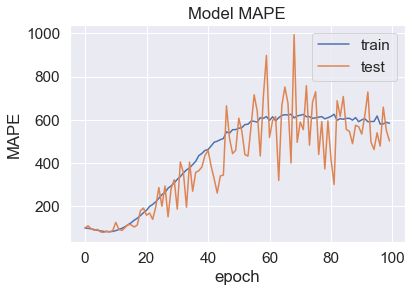

In [23]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test']) 
plt.show()

plt.plot(history.history['mean_absolute_percentage_error']) 
plt.plot(history.history['val_mean_absolute_percentage_error']) 
plt.title('Model MAPE') 
plt.ylabel('MAPE') 
plt.xlabel('epoch') 
plt.legend(['train', 'test']) 
plt.show()

**Issues and Improvements**

1) Image regression is in general a difficult task and many papers get rmse in the range of 5000-1000 for various price prediction problems.

2) Data points that look similar do have widely different prices which is a problem

3) The range of proces is very different ed. ROlex min proce is $800 but max price is about $37000